In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

# Pyplot: python plotting for matlab users

`matplotlib.pyplot` is a set of functions that has a similar functionality as MATLAB. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x = np.array([1, 2, 3, 4, 5])
y = x**2

Text(0, 0.5, 'x squared')

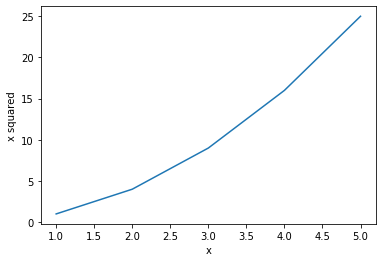

In [9]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("x squared")

<div class="alert alert-block alert-info">
    Try it out: Make a plot!
</div>

You can add style using format strings (just like MATLAB) or using specific keyword arguments. The example below using a format string,

    fmt = '[marker][line][color]'
    

Common keyword arguments are:

* `color`: Line and marker color (e.g. `'green'`)
* `linestyle` or `ls`: Line style (e.g. `'-'`)
* `linewidth` or `lw`: Line width (e.g. `2`)
* `marker`: The marker style (e.g. `'o'`)
* `markersize` or `ms`: Size of the marker (e.g. `12`)

[More Keyword arguments for `plt.plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)

Text(0, 0.5, '$x^2$')

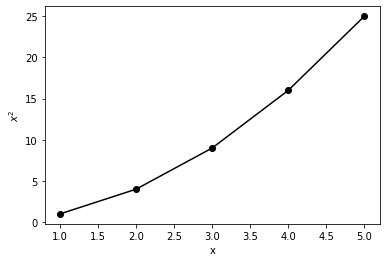

In [13]:
plt.plot(x, y, '.-k', markersize=12)
plt.xlabel("x")
plt.ylabel("$x^2$")

You can also use latex in the text (as shown above, `$x^2$`)!
<div class="alert alert-block alert-info">
    Try it out: Modify the style of your plot
</div>


## More colors!

There are *so* many ways to define colors in matplotlib:

* RGB or RGBAA tuple: (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.8)
* Hex RGB or RGBA string: “#0F0F0F” or “#0F0F0F0F”
* Grayscale value: “0.5” 
* String shortcuts: “b”, “g”, “r”, “c”, “m”, “y”, “k”, “w”
* X11/CS4 color names: “blue”, “green”, “goldenrod”, ...
* [Xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/): “xkcd:sky blue”
* CN color (matplotlib line colors): “C0”, “C1”, … “C9”
* Tableau colors: “tab:green”, etc.

![XKCD color survey examples](https://i1.wp.com/imgs.xkcd.com/blag/assorted_colors.png?zoom=2)

Text(0, 0.5, '$x^2$')

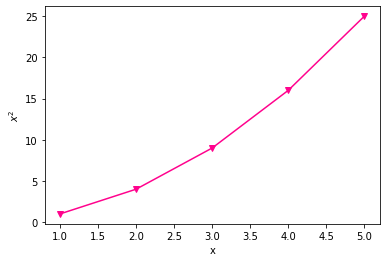

In [17]:
plt.plot(x, y, marker='v', color="xkcd:hot pink")
plt.xlabel("x")
plt.ylabel("$x^2$")